# Summary
- remove ( and what withing)
- langauge

# Setup and Detect Language

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import langid
import os
os.chdir("/home/david/Desktop/projects/NameEmbedding")

with open('./data/raw/text/validation_names_processed.txt', "r") as file:
    validation_names_txt = [line.strip() for line in file]
validation_names_txt_random_100k = random.sample(validation_names_txt, 100_000)
languages = []
for name in tqdm(validation_names_txt_random_100k):
    language, _ = langid.classify(name)
    languages.append(language)

100%|██████████| 100000/100000 [03:26<00:00, 484.37it/s]


ml    39789
en    23748
de     4095
es     2932
fi     2084
      ...  
lb        1
ky        1
fo        1
pa        1
th        1
Name: count, Length: 79, dtype: int64

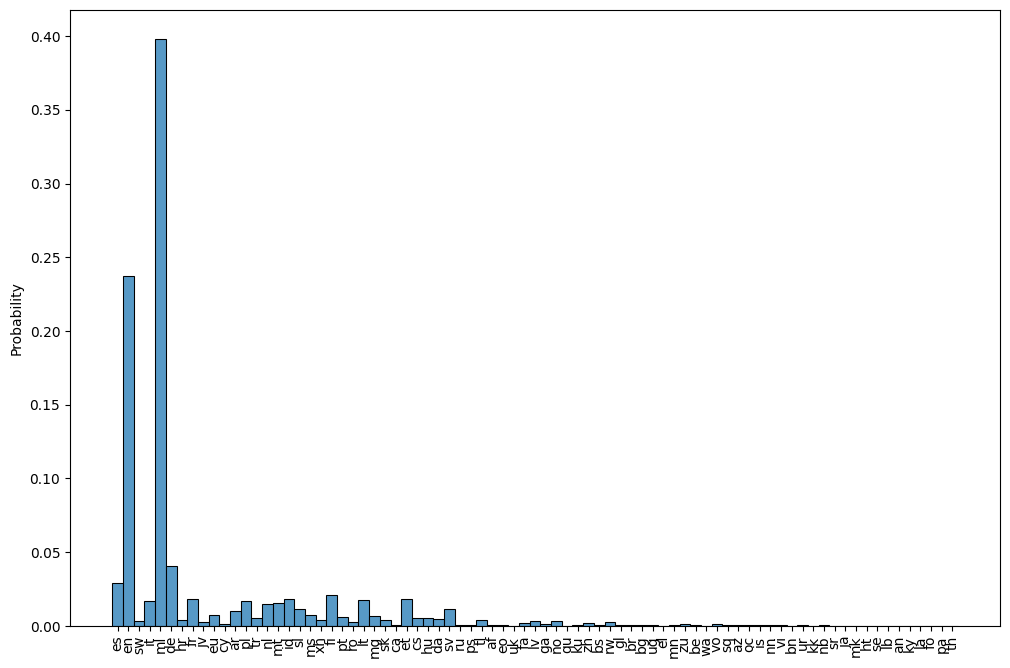

In [17]:
langauge_df = pd.Series(languages)
display(
    langauge_df.value_counts()
)
plt.figure(figsize=(12,8))
sns.histplot(langauge_df, stat='probability')
plt.xticks(rotation=90)
plt.show()

In [25]:
names_and_languages = pd.DataFrame({'name':validation_names_txt_random_100k,
                                    'language':languages})
display(names_and_languages[names_and_languages['language']=='ms'])
names_and_languages.to_csv('/home/david/Desktop/projects/NameEmbedding/data/testing/names_and_languages_100k.csv',index=False)


,name,language
100,mavilagopalan nambiar,ms
633,aliarukunju,ms
841,akhmatullina,ms
1047,akihata,ms
1081,rijin mukundan,ms
...,...,...
99093,ambadi asok,ms
99323,shihasbabu,ms
99458,rahul ranjan,ms
99498,thirunavukkaras,ms


# Detect unique chars

In [27]:
[x for x in validation_names_txt if '(' in x]

['ലയ ആൻ(ഡൂസ്',
 'kharel(sitaula)',
 'കൊച്ചുമോൾ(ലിൻറാമോൾ)',
 '(ham)',
 'ഷാലമ്മ. (സി.ശുഭ)',
 'narayanan (manukkuttan)',
 'joseph(gilson)',
 'mani(kunjaru)',
 'john (joni)',
 'muhammad (kunjimon haji)',
 'suresh kumar (sudheesh)',
 'perumal (rajan)',
 'mukami(thankam)',
 'unni (arumukhan)',
 'muhammed kunji (kunjimon)',
 'വിജിൽ(പസാദ് കെ എസ്',
 'കമ്മുക്കുട്ടി(കുഞ്ഞിമോൻ)',
 'കുഞ്ഞീറ്റി(മോളി)',
 'സുരേഷ് (മുരുകൻ)',
 'ahammadkutti(bava)',
 'fathima (kunjimol)',
 'molly joshi (aniyamma thomas)',
 'കുഞ്ഞിമുഹമ്മദ്(ബാപ്പു)',
 'ഷംസുദ്ധീൻ(അബ്ദുറഹിമാൻ)',
 '(joyce)',
 'ഏല്യ(ആലീസ്)',
 'elsy (saly)',
 'ഇത്താപ്പ (ഉണ്ണി)',
 'ച(ന്ദന്',
 'കുഞ്ഞിമമ്മു (കുഞ്ഞിബാപ്പു)',
 'bavanu (hasainar)',
 'appu (velu)',
 'nabeesakutti (muhammad)',
 'sreekumar (balan)',
 'സാബു (ആന്റണി)',
 'kunhambu (parammal)',
 'mini v(sr.thejas)',
 'എബ്രഹാം മാത്യുു (തങ്കച്ച൯)',
 'kalyani (thankammuamma)',
 'mani(haridasan)',
 'മറിയം(ഷൈനി)',
 'thomas(jonsan)',
 'സിന്ദു (മാളു)',
 'ത്രേസ്യ(ആനി)',
 '(tinus)',
 'എം.എസ് രാജേ(ന്ദ൯',
 'alice (thr

# Load Names Data with Lanugage

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/home/david/Desktop/projects/NameEmbedding/')

training_data = pd.read_csv('./data/processed/text/training_names_and_languages.csv')
training_data.iloc[:5]


,name,language
0,ജോൺ.കെ.ബി,ml
1,sahad salam,id
2,hajisheykhi,xh
3,റസിയ നൂർജഹാൻ,ml
4,ജോസഫ് എ.എ,ml


In [2]:
frequency_table = training_data['language'].value_counts()
relevant_languages = list(frequency_table[frequency_table>1000].index)
print(f'{len(relevant_languages)} will be taken into account')

for language in relevant_languages:
    temp_names = training_data[training_data['language'] == language]
    print(f'Lang: {language}')
    display(temp_names['name'].values[:10])
    print('')

69 will be taken into account
Lang: ml


array(['ജോൺ.കെ.ബി', 'റസിയ നൂർജഹാൻ', 'ജോസഫ് എ.എ', 'ശില് പി കെ',
       'സമീന്ദ്രൻ.എൻ.കെ', 'മുഹമ്മദ് ഷുഹൈബ് കെ കെ', 'ജോസഫ് പോൾ കെ',
       'സനൽ ജിയോ ജേക്കബ്', 'അബ്ദുറഹ്മാൻ ബി', 'റൈഹാന.എ'], dtype=object)


Lang: en


array(['olivarria', 'evsyukhin', 'coumarane', 'k.gopalakrishnamarar',
       'charrise', 'thayu', 'huzaina', 'currlin', 'prince sundaresh',
       'kunjivelutha'], dtype=object)


Lang: de


array(['pakaneh', 'mufasiya', 'sunil. pi.mani', 'anura reji',
       'maraichelvan', 'sauermoser', 'mohean', 'schafner', 'alqrache',
       'youfina'], dtype=object)


Lang: es


array(['haseena c.k', 'mridula viswambharan', 'alma rose devasia',
       'presobhakumari', 'vitales', 'sisrarar pavugaa', 'binsu samuel',
       'munashe', 'murikadas', 'joel binu'], dtype=object)


Lang: fi


array(['mattuhut', 'maihefulaiti', 'naveen ashokan', 'swapna. kutty',
       'lybäck', 'sumayyadheen.j.h', 'mukaimachi', 'naseema sulfikkar',
       'salikkutti joseph', 'taikou'], dtype=object)


Lang: pl


array(['sylwiaj', 'goddia', 'luwaca', 'zasha', 'struniewicz', 'bardoń',
       'bulović', 'szwałko', 'amalrani', 'ani rajesh'], dtype=object)


Lang: id


array(['sahad salam', 'subrahmanyanporari', 'saliyan', 'sooryanarayan',
       'joatan', 'kanakambaran pilla', 'shailaja purushothaman',
       'jayanthan naboodiri', 'khandanyan', 'manjju cheriyan'],
      dtype=object)


Lang: it


array(['neelavathi ammal', 'greeshma chakrapani', 'biancianello',
       'fathima filsana', 'padicheri kunhimoosa.p.v.', 'laomettachit',
       'holari', 'kovvalveettilvalsala', 'tagliolato', 'si maimoonath'],
      dtype=object)


Lang: fr


array(['louvin', 'suveesh mohan', 'huaimao', 'delêtre', 'sautron', 'casà',
       'balu. b. nair', 'nirmala gireesh', 'chandu sourav',
       'du chatinier'], dtype=object)


Lang: et


array(['aadhikeshavan', 'neraasha', 'aysathul aseena', 'mühlradt',
       'manooha', 'deepa rai', 'athilakshm', 'liisanantti',
       'muhammed simsar', 'samarendu'], dtype=object)


Lang: lt


array(['gimovsky', 'vyakuladima', 'sarojinimma', 'jamarrius', 'bossolini',
       'jaitak', 'libinamol', 'jomol jaimon', 'kadejia', 'rijo n.j'],
      dtype=object)


Lang: mt


array(['sisrarar jisi vadakkethalaykkal', 'bojjireddy',
       'panikar jisha sundaran', 'bharath radhakrishnan', 'goncaloǧlu',
       'jinani', 'sajin sundar achary', 'jiji.r', 'vijith unnikrishnan',
       'nija markose'], dtype=object)


Lang: nl


array(['kruiper', 'sreeraj k.p', 'rachmiatie', 'riju sam',
       'dheeraj kumar', 'bierdel', 'riyas muneer', 'sreersha', 'strevens',
       'bojdo'], dtype=object)


Lang: ar


array(['هيرلن', 'مونيت', 'مُلْحَتْ', 'عَبْدُه هَيْشَان', 'الخولاني',
       'بيليو', 'بِنْكُلِّيّ', 'فَيْشَن', 'كلاونيوس', 'هاريوت'],
      dtype=object)


Lang: sv


array(['e.m. janaki amma', 'binduamma', 'awamma mashooda', 'avsyuk',
       'mellanchini', 'jaysamma scaria', 'pelyavskyy', 'pensomboon',
       'shirbande', 'pristansky'], dtype=object)


Lang: sl


array(['praveena prabhu', 'nisni ashraf', 'sreerenjini.r.s',
       'sreejas rajan', 'raslescu', 'shamane hannah josen',
       'parayil vda kunjalu', 'mariyaummakkunj', 'godovova', 'sreja'],
      dtype=object)


Lang: ms


array(['vijayakhosh.', 'anjana sailakshmi', 'chakhovskaya',
       'nihal puthiyakam', 'soljan rebera', 'zubair kuttukkan',
       'nihal ahamad', 'varun kesav.t.s', 'vijayakumara pillay k. k.',
       'muhammadaliravuthar'], dtype=object)


Lang: eu


array(['treeza mol', 'prabish nair', 'faushida. p.', 'masundire',
       'zubaida.t', 'baldeyroux', 'mestitz', 'ibrahimma', 'tazul',
       'chatzav'], dtype=object)


Lang: mg


array(['seethu chandran', 'seena ramachandran', 'sivachandraprasad',
       'prajil chandran', 'shobana vedachalam', 'vondre', 'lazahari',
       'vandana m.v', 'ayisha shafana', 'vijayachandrakumari'],
      dtype=object)


Lang: cs


array(['bohálová', 'heraltová', 'vochyánová', 'trèková', 'cázares',
       'gamgaprasad si ji', 'sahad.si.p', 'ruohol', 'jinovinsent',
       'krejčã'], dtype=object)


Lang: pt


array(['kunhami kottekat', 'alharguse', 'tiroum', 'atnç', 'santosgusmão',
       'kadadevarmath', 'sinoy em ke', 'subaida hamsa', 'leela mary.a.v',
       'athira das .k'], dtype=object)


Lang: hu


array(['onésio', 'sárka', 'zolghadre', 'rondó', 'jess_y sakhariya',
       'hinsz', 'mártha', 'erismário', 'sreegha', 'meszka'], dtype=object)


Lang: tr


array(['peştereli', 'asha si. nayar', 'aǧrtaş', 'aktü', 'akbıyık', 'özeş',
       'chathunampyar', 'vi.je.malar', 'belkız', 'mullankkandi shamnesh'],
      dtype=object)


Lang: da


array(['ahammed nishad. t.m', 'kaberger', 'padikkerath janaki', 'møll',
       'narangi devi', 'ravikumar. m.r', 'imthikaf alam',
       'fathima afreena', 'børsheim', 'sydykbekov'], dtype=object)


Lang: sk


array(['bernatené', 'pudjibudojo', 'anshid. kt', 'kosenkova', 'bašnárová',
       'roshkovan', 'týnek', 'držislav', 'najila.kp', 'obusckovic'],
      dtype=object)


Lang: hr


array(['kadar kunji pi', 'rašović', 'vijesh puthiyapurayil',
       'pororoković', 'ijesh.pi.c', 'kovrigo', 'baćanović',
       'golda susan zachariah', 'niranjan.m', 'liji johni'], dtype=object)


Lang: ro


array(['ebroli saumini', 'fosmero', 'carenx', 'bâtea', 'suarezgonzalez',
       'treble', 'nallulwar', 'duprat', 'bartuli', 'rădan'], dtype=object)


Lang: tl


array(['unggurawirote', 'muhammadmahashookk', 'akshay jayakumar',
       'nishathmuhammad.p.m', 'hamsathul anas', 'kanlayanarat',
       'muhammajhaneefa', 'sahura ansabeevi', 'muhammed jidad',
       'narayan sivaa kumar'], dtype=object)


Lang: xh


array(['hajisheykhi', 'swatha bakitha vivera', 'darshana unnikrishnan',
       'thayyen', 'naseeha khalid', 'nathasha viswanathan',
       'muhammed zeeshan', 'lekha.h.m', 'susheela iqbal',
       'aswathi vishwanathan'], dtype=object)


Lang: sw


array(['anupama chettikkad', 'omana yam yam', 'sajini sadanandan',
       'shaji yousuf', 'asfana muhammed suhail', 'jubairiya muhammed',
       'divya puthiya veettil', 'udhayavel', 'sajiya jabil',
       'jithya dhanesh'], dtype=object)


Lang: lv


array(['sanasie', 'compant', 'danasekar', 'kruopiene', 'kadeejath jumjan',
       'kleviene', 'nifi kuriakose', 'gopala krishna kuruppu',
       'n.dhanasekaran', 'mahajabijumana'], dtype=object)


Lang: no


array(['vilbrattspensiliros', 'mohammed ali shahshad', 'muhammed fasil.n',
       'mohammed rajula', 'jahfar kunnath', 'al shabin mohammed',
       'haugbølle', 'chekkeri ayisha', 'mohammed jashin',
       'ke sreesharaja shetti'], dtype=object)


Lang: rw


array(['somarajankurupp', 'safeela narikkodan', 'muhammed vajid kt',
       'nyamutswa', 'noor muhammed sulaiha', 'kittipanyangam',
       'heera aadithyan', 'anurag kalluvalappil', 'muhammad shafeeq k.k',
       'pouly kuriyan'], dtype=object)


Lang: jv


array(['radhakrishnan .p.g', 'namasivayamchettiyar', 'sudhakara prasad',
       'sayanth sudhakaran', 'dharaneedharannayar', 'sudha.k.c',
       'velayudhan masttar', 'jayasudha .g', 'sahijram',
       'sruthi vidyadharan'], dtype=object)


Lang: zh


array(['lehad', 'hyonhui', 'manzhurtseva', 'šakalyte', 'šajber',
       'salimato', 'zhengnan', 'cirjak', 'šimandl', 'sprin¸ǵe'],
      dtype=object)


Lang: fa


array(['جاداف', 'زوهلوف', 'سامات', 'زفامردام', 'سامون', 'تاناجورا',
       'هولتزل', 'ابغار', 'نفراتنا', 'ناتما'], dtype=object)


Lang: ga


array(['ganeshan eacha koovathodan', 'anitha krasta', 'sneha ann babu',
       'rohitha reghunath', 'reshnitha chali', 'nitha sidharthan v.',
       'kavitha.k.s.nair', 'baisil shaju', 'smitha sara mathew',
       'savitha dharman'], dtype=object)


Lang: ru


array(['яухария', 'ганей', 'бикир', 'коrnienko', 'фаизульгаян', 'хикмят',
       'ромель', 'ильхим', 'карельская', 'нифтул'], dtype=object)


Lang: vo


array(['ashifa a.a', 'asifa peringodan', 'arifa shahanas', 'latifarod',
       'hifa-eslem', 'arifa jumna', 'wölcke', 'cifatte', 'mehanas sheyk',
       'gifani'], dtype=object)


Lang: cy


array(['bichu george', 'prashob eldho', 'willanô', 'daufï',
       'asharaf kodoli punathil', 'bhargwan', 'chiniadis',
       'jithu satheesan', 'niedda', 'neethu nadh'], dtype=object)


Lang: ps


array(['لِهُنِيد', 'شنغوري', 'نايغي', 'سيلولواني', 'دينلون', 'سابرلنغ',
       'اريندوندو', 'تيغين', 'بوتيشيلي', 'اتلانيرسا'], dtype=object)


Lang: zu


array(['rakhitha krishnan', 'shanmukhathay', 'sayyithmuhammadkoyathangal',
       'vinitha ayyappan', 'sammukhathayi', 'dhaniya somasekharan',
       'reetha sebasraryan', 'pienpringam', 'akhitha vasudevan',
       'thayathatt asinar'], dtype=object)


Lang: eo


array(['praveen kundupokil', 'monikka fernandas', 'hareesh malya',
       'daniel lobo', 'supadilokluck', 'kesavan embaranthiri',
       'rosinaldo', 'ruraldo', 'jobson kurian', 'malavika gayu'],
      dtype=object)


Lang: br


array(['bignéalcañiz', 'nagymzhanov', 'don antezhs', 'hamza alikandan',
       'nakoudi', 'darzhaeva', 'grammatikou', 'hadizha', 'creuzete',
       'lijomon david'], dtype=object)


Lang: ug


array(['شوريوكن', 'ريزينسكي', 'كونجار', 'زينتشينكو', 'غروناو',
       'بيرناسكوني', 'كاتسونو', 'نوكتا', 'بوزنوسكي', 'غنجان'],
      dtype=object)


Lang: sq


array(['maksima gji', 'gjorchev', 'ryenchindorj', 'boëx', 'rajeshjoboyi',
       'jerin shaju', 'juodsnukytë', 'manjishtha', 'ke si john',
       'treesa maria henry'], dtype=object)


Lang: af


array(['bekki annie jorjj', 'shajeer khan. m.', 'sansheer sirajudheen',
       'geena annie mathew', 'sabeer mehaboob', 'angel mary skaria',
       'nabeel nasim', 'tteena annie mathew', 'bonnie george koshy',
       'sudheer ummar'], dtype=object)


Lang: nn


array(['shokribousjein', 'edeilda', 'geindre', 'jeraldin fildas',
       'rehmathunneesa', 'durgasree hareendran', 'eerinjekkab',
       'akbar shareef paravakkal', 'ronald krastta', 'øoystein'],
      dtype=object)


Lang: az


array(['küҫükkartallar', 'nevzatoğlu', 'münger', 'prasad ayyer',
       'sumayya e.e', 'hat’ko', 'züngün', 'ayyappanayar', 'samiyya kc',
       'hüseyýn'], dtype=object)


Lang: mn


array(['чжэньсин', 'гирша', 'мд фахед', 'салмгарай', 'богос', 'кайом',
       'габбиб', 'шагалей', 'хурматулла', 'файма'], dtype=object)


Lang: ca


array(['saïchi', 'rafaï', 'broxer', 'shobha dutt', 'ashlin ambrose',
       'dorissaint', 'aysha fida subair', 'sherit tresa peters',
       'bataïni', 'mbaïtiga'], dtype=object)


Lang: bg


array(['мина', 'мириама', 'тзофил', 'зира', 'октавия', 'ирениуш',
       'изедин', 'мирзагит', 'антонида', 'кирена'], dtype=object)


Lang: oc


array(['leclèr', 'braganò', 'kaireviçe', 'anu tresa joseph', 'tamizarasi',
       "joseph d' coth", 'koustanaï', 'sureshkumar lalwani', 'ndèye',
       'neha elsa john'], dtype=object)


Lang: bs


array(['ranjay pandit', 'zijerdi', 'anjali raisa chacko',
       'satyajeev unoy', 'sosamma kunjukunj', 'kunjammath kutti',
       'strugarević', 'tti.ar.hymavathy kunjamma', 'kunjakutty',
       'bindhu zacharia'], dtype=object)


Lang: ku


array(['shahana sherin nt', 'vipin kumar divakaran', 'navya ann jihnson',
       'bilbija', 'volnês', 'lamiha biniyamin', 'mannaî', 'daliya jimmy',
       'rênystton', 'telêmaco'], dtype=object)


Lang: be


array(['валяда', 'раммэль', 'татьяны', 'маура', 'муллакай', 'каральби',
       'мана', 'эмлен', 'азку', 'янубай'], dtype=object)


Lang: vi


array(['khanfakhraei', 'frônio', 'd’cunha', 'rakhshankhah', 'haydêe',
       'farookhabdulkhadar', 'likhin lekshmanan', 'oʇuzhan', 'cetđn',
       'khayertynova'], dtype=object)


Lang: is


array(['vilibiæ', 'yasýn', 'vаndenbroele', 'shafi mappila kund', 'heiða',
       'garðarsdottir', 'mohamed shafi pullatt', 'ashraf ekkalam',
       'snjólaug', 'dambаa'], dtype=object)


Lang: gl


array(['comendeiro', 'simi sara chacko', 'gaiteiro', 'biro mathew',
       'eguiazú', 'grueiro', 'ontañón', 'jagadeesh g.nambiar',
       'villafáñez', 'espiñeira'], dtype=object)


Lang: nb


array(['yohnokuke', 'anil unni krishnan', 'eggelte',
       'puthiyakovil kunhikannan', 'surendran velu', 'maillerte',
       'jonfeliks', 'bjerkseter', 'emil punnen babu', 'thelge'],
      dtype=object)


Lang: ht


array(['adnène', 'kalariyadathrohini', 'boujelbène',
       'k.pi.krishnan nampoothiri', 'fattima malar',
       'harinandanan namboothiri', 'ann lizbeth joseph', 'mohanan si en',
       'simon malayil george', 'lohouès'], dtype=object)


Lang: ur


array(['مُؤمِن', 'زُهْر', 'جوتْكار', 'جِرْجِيس', 'غُنَيْنم', 'مُعْوزِي',
       'دَسْتَجِرْدِيّ', 'بَوْنِي', 'مُعَرْبِس', 'سَوْد'], dtype=object)


Lang: uk


array(['харисулла', 'дипти кумар', 'виллун', 'миндар', 'умикамал',
       'аннна', 'забих', 'пеня', 'милентуй', 'альвитта'], dtype=object)


Lang: kk


array(['шамшикамер', 'султанмажид', 'туйблат', 'бархатша', 'еленай',
       'джаемун', 'бернанда', 'кабылбек', 'даербек', 'джамфер'],
      dtype=object)


Lang: bn


array(['নাজীফা', 'তাযিন', 'শফিক', 'সাইফুল হাসান', 'তাবাসসুম', 'মাহমুদা',
       'কাওকাব', 'মাহবুব উল আলম চৌধুরী', 'দিব্যা', 'আবিদা'], dtype=object)


Lang: qu


array(['shaiqa', 'sheykhabdulla', 'shaykha', 'tillashaykhov', 'thiqa',
       'khaykina', 'seyfullahogullari', 'abdullakhodzhaeva',
       'muna abdul raheem ishaq jasmi', 'сhaykovskaya'], dtype=object)


Lang: sr


array(['фаткутдин', 'тауфик', 'прогресса', 'мечислав', 'куртдин',
       'харалампос', 'нуреддин', 'зинур', 'димиод', 'лимзит'],
      dtype=object)


Lang: ja


array(['vanĕk', 'huŉg', 'fetecǎu', 'lyǒka', 'gǎianu', 'ŕveret', 'bucatǎ',
       'corre̊a', 'orǎsan', 'h⊘jlund'], dtype=object)


Lang: se


array(['paldusová', 'laisamma abraham', 'jasamma jose',
       'saramma roji george', 'abdul vahid cholakkan', 'shinamma john',
       'jessamma scariah', 'achamma job', 'štäpánkovãi',
       'laisamma chacko'], dtype=object)

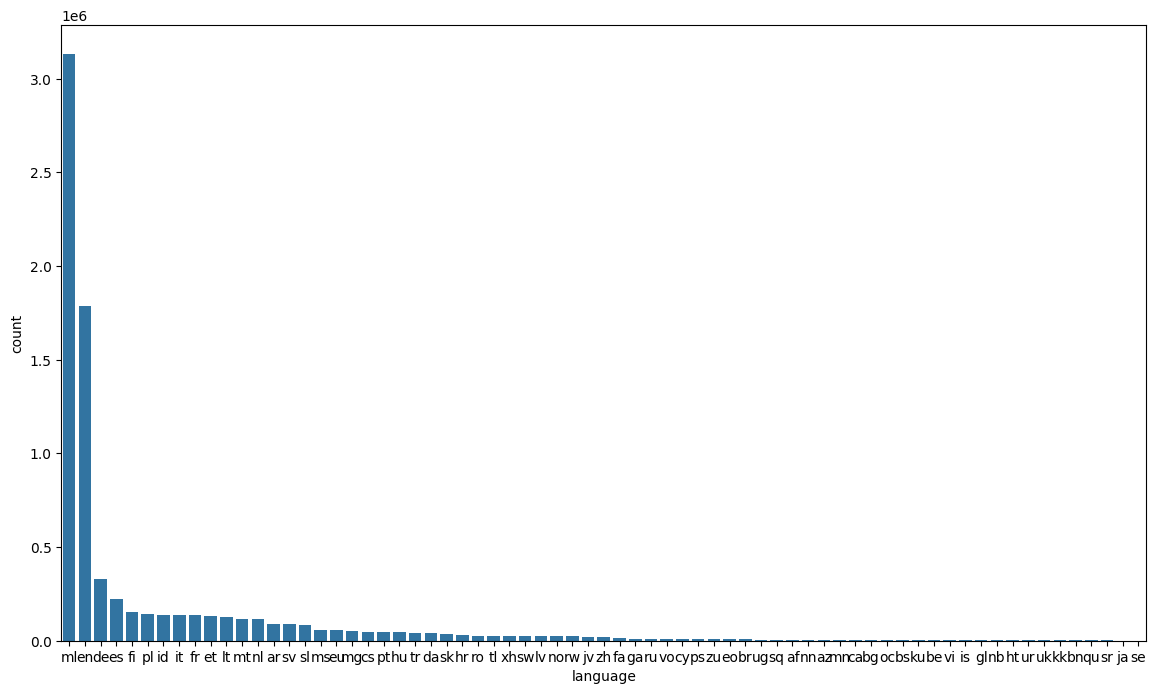

In [3]:
temp_df = frequency_table[frequency_table>1000].reset_index(drop=False)
plt.figure(figsize=(14,8))
sns.barplot(data=temp_df, x = 'language', y='count')
plt.show()

In [4]:
training_data[training_data['language'] == 'he']

,name,language
435292,schȕtte,he
907546,geŕonimo,he
1200478,ŕsimont,he
6215768,mentŕé,he
7239567,hussler,he
7512949,mir•eski,he
7748240,mayina•kahaer,he


In [5]:
•

SyntaxError: invalid character '•' (U+2022) (4249647458.py, line 1)

# ASCI

In [6]:
# from tqdm import tqdm

# # List of words in different languages
# words = ["hello", "こんにちは", "bonjour", "Привет", "hola", '•', 'hussler', 'schȕtte', 'uȕ']

# def get_ascii_range(word):
#     ascii_values = [ord(char) for char in word if ord(char)]
#     if ascii_values:
#         return min(ascii_values), max(ascii_values), np.mean(ascii_values)
#     else:
#         return None

# ascii_ranges = {word: get_ascii_range(word) for word in words}

# # Print the results
# for word, ascii_range in ascii_ranges.items():
#     if ascii_range:
#         print(f"Word: {word}, ASCII Range: {ascii_range}")
#     else:
#         print(f"Word: {word}, No ASCII characters found.")

# training_data['asci_min']=0
# training_data['asci_max']=0
# training_data['asci_mean']=0
# for j in tqdm(range(1000)): # len(training_data)
#     word = training_data['name'][j]
#     min_,max_,mean_ = get_ascii_range(word)
#     training_data['asci_min'][j] = min_
#     training_data['asci_max'][j] = max_
#     training_data['asci_mean'][j] = mean_

Word: hello, ASCII Range: (101, 111, 106.4)
Word: こんにちは, ASCII Range: (12371, 12435, 12397.0)
Word: bonjour, ASCII Range: (98, 117, 109.57142857142857)
Word: Привет, ASCII Range: (1055, 1090, 1077.3333333333333)
Word: hola, ASCII Range: (97, 111, 105.0)
Word: •, ASCII Range: (8226, 8226, 8226.0)
Word: hussler, ASCII Range: (101, 58722, 7437.0)
Word: schȕtte, ASCII Range: (99, 533, 169.14285714285714)
Word: uȕ, ASCII Range: (117, 533, 325.0)


  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_61748/1966046835.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  training_data['asci_max'][j] = min_
/tmp/ipykernel_61748/1966046835.py:28: SettingWithCopyWarning: 
A value is tryin

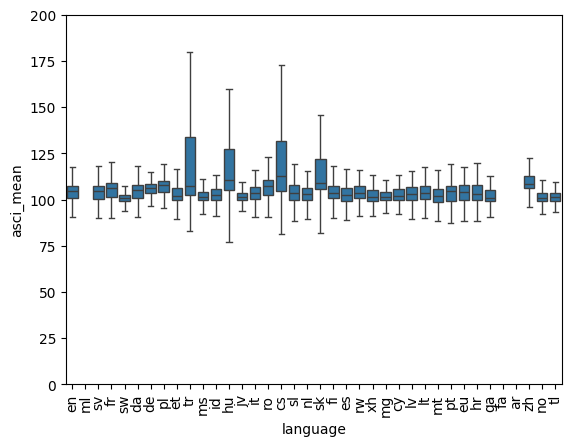

Before


language
ml    3130794
en    1787869
de     326748
es     221792
fi     153861
       ...   
bn       1815
qu       1568
sr       1222
ja       1155
se       1055
Name: count, Length: 69, dtype: int64

After


language
ml    3130794
en    2365892
de    1011425
es     833297
fi     694051
       ...   
bn      75381
qu      70064
sr      61853
ja      60133
se      57471
Name: count, Length: 69, dtype: int64

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

training_data_and_ascii = pd.read_csv("/home/david/Desktop/projects/NameEmbedding/data/processed/text/training_names_languages_and_ascii.csv")
validation_data_and_ascii = pd.read_csv("/home/david/Desktop/projects/NameEmbedding/data/processed/text/validation_names_languages_and_ascii.csv")

relevant_languages = list(validation_data_and_ascii['language'].value_counts()[validation_data_and_ascii['language'].value_counts() > 1000].index)

sns.boxplot(validation_data_and_ascii[validation_data_and_ascii['language'].isin(relevant_languages)], y = 'asci_mean', x ='language', showfliers=False)
plt.ylim((0,200))
plt.xticks(rotation=90)
plt.show()
# _ = pd.DataFrame(validation_data_and_ascii.groupby('language')['asci_mean'].mean()).reset_index()
# mask = _['language'].isin(relevant_languages)
# sns.boxplot(_[mask], x = 'language', y='asci_mean')
# plt.show()

# Logarithmic or Power-Law Scaling Function
def scale_and_resample(df, column='language', alpha=0.5):
    counts = df[column].value_counts()
    max_count = counts.max()
    scaling_factor = max_count / (np.log(max_count + 1) if alpha == 'log' else max_count**alpha)

    target_sizes = {
        category: int((np.log(count + 1) * scaling_factor) if alpha == 'log' else (count**alpha) * scaling_factor)
        for category, count in counts.items()
    }

    resampled_dfs = []
    for category, target_size in target_sizes.items():
        subset = df[df[column] == category]
        if len(subset) < target_size:
            resampled = resample(subset, replace=True, n_samples=target_size, random_state=42)
        else:
            resampled = resample(subset, replace=False, n_samples=target_size, random_state=42)
        resampled_dfs.append(resampled)

    return pd.concat(resampled_dfs)

# Apply the function
print('Before')
proportions = training_data_and_ascii['language'].value_counts()
proportions = proportions[proportions>1000]
languages = list(proportions.index)
display(proportions)
balanced_df = scale_and_resample(training_data_and_ascii[training_data_and_ascii['language'].isin(languages)], alpha=0.5)
print('After')
display(balanced_df['language'].value_counts())



In [34]:
more_than_1m = ['ml', 'en', 'de']
lower_than_1m = balanced_df[~balanced_df['language'].isin(more_than_1m)]

dfs = []
for lang in more_than_1m:
    dfs.append(balanced_df[balanced_df['language'] == lang].sample(n=1_000_000, replace=False))
more_than_1m_sampled = pd.concat(dfs, axis=0, ignore_index=True)
resampled_data = pd.concat([more_than_1m_sampled, lower_than_1m], axis=0, ignore_index=True)

resampled_data['language'].value_counts()

language
ml    1000000
en    1000000
de    1000000
es     833297
fi     694051
       ...   
bn      75381
qu      70064
sr      61853
ja      60133
se      57471
Name: count, Length: 69, dtype: int64

In [35]:
resampled_data.to_csv('/home/david/Desktop/projects/NameEmbedding/data/processed/text/training_names_and_languages_resampled.csv',index=False)


In [36]:
resampled_data

,name,language,asci_min,asci_max,asci_mean
0,ചന്ദ്രശേഖരൻ നായർ പി കെ,ml,32,3452,2928.227273
1,അമൃതാ ശശി,ml,32,3395,3004.777778
2,അൻവർ കബീർ,ml,32,3452,3023.777778
3,അമീർ സാദത്ത് കെ ടി,ml,32,3452,2823.444444
4,സൽഗമ്മ,ml,3351,3453,3390.166667
...,...,...,...,...,...
21384483,muhammadu hassan,se,32,117,101.812500
21384484,adin ahammad,se,32,110,96.416667
21384485,elsamma josaf,se,32,115,99.923077
21384486,yelđz,se,101,273,145.000000
